In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load your dataset
filename = 'advertising.csv'
df = pd.read_csv(filename)

# Choose predictors and response
predictors = ['TV', 'Radio', 'Newspaper']
X = df[predictors].values
y = df['Sales'].values

In [3]:
# Bootstrapping parameters
n_bootstrap = 1000  # number of bootstrap samples
n_samples = len(df)

# Initialize an array to store beta coefficients
beta_bootstrap = np.zeros((n_bootstrap, X.shape[1] + 1))  # +1 for intercept

In [4]:
# Bootstrap loop
for i in range(n_bootstrap):
    # Sample indices with replacement
    indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
    
    X_resample = X[indices]
    y_resample = y[indices]
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X_resample, y_resample)
    
    # Store intercept and coefficients
    beta_bootstrap[i, 0] = model.intercept_
    beta_bootstrap[i, 1:] = model.coef_


In [5]:
# Analyze the bootstrap results
beta_means = beta_bootstrap.mean(axis=0)
beta_std = beta_bootstrap.std(axis=0)

print("Bootstrap estimates (mean ± std):")
for i, name in enumerate(['Intercept'] + predictors):
    print(f"{name}: {beta_means[i]:.3f} ± {beta_std[i]:.3f}")


Bootstrap estimates (mean ± std):
Intercept: 2.966 ± 0.333
TV: 0.046 ± 0.002
Radio: 0.188 ± 0.011
Newspaper: -0.001 ± 0.006


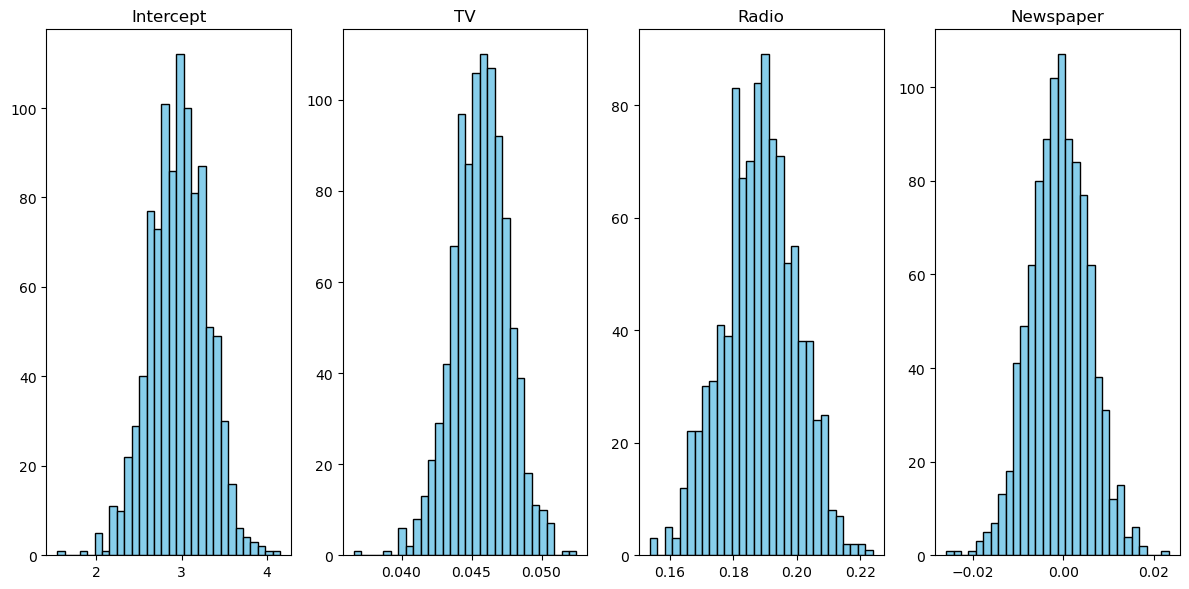

In [6]:
# Visualize the distribution of beta coefficients
plt.figure(figsize=(12, 6))
for i, name in enumerate(['Intercept'] + predictors):
    plt.subplot(1, 4, i+1)
    plt.hist(beta_bootstrap[:, i], bins=30, color='skyblue', edgecolor='k')
    plt.title(name)
plt.tight_layout()
plt.show()